In [1]:
#load library
import pickle
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
np.random.seed(42)  #constant output

In [2]:
#load data
LoadData=pd.read_csv(r"Salary_Data.csv")

In [3]:
#load sample from data
print(LoadData.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [4]:
# describe data 
print(LoadData.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [5]:
# show missing data
print(LoadData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


In [6]:
#lablel data
x=LoadData.drop("Salary",axis=1)# input
y=LoadData["Salary"] #output

In [7]:
# split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
#scale data and choose model
model=make_pipeline(MinMaxScaler(),LinearRegression())
print(model)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])


In [9]:
#train model 
model.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [10]:
#best train ,best test
print(model.score(x_train , y_train))
print(model.score(x_test , y_test))

0.9645401573418146
0.9024461774180497


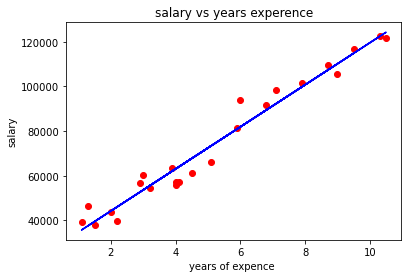

In [11]:
#draw model train
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,model.predict(x_train),color="blue")
plt.title("salary vs years experence")
plt.xlabel("years of expence ")
plt.ylabel("salary")
plt.show()

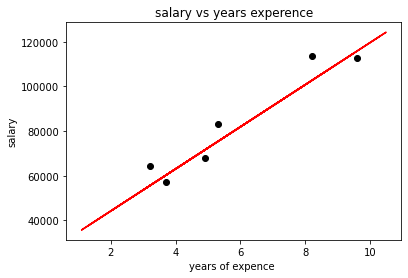

In [12]:
#draw model test
plt.scatter(x_test,y_test,color="black")
plt.plot(x_train,model.predict(x_train),color="red")
plt.title("salary vs years experence")
plt.xlabel("years of expence ")
plt.ylabel("salary")
plt.show()

In [13]:
#save model
pickle.dump(model,open(r"salary_data.pkl","wb"))